In [17]:
# from google.colab import drive
# drive.mount('/content/drive/')

# authtoken = '2Wo2JaYs27cqjt5GYNchr85iqL8_4KrpUP41d7XY91nW2jxLW'
# password = 'minseok305'

# from colab_ssh import launch_ssh
# launch_ssh(authtoken, password)

import cv2
import matplotlib.pyplot as plt
import numpy as np


filepath = 'C:/Users/image/cat.jpg'
gray_cat = cv2.imread('C:/Users/image/cat.jpg' , cv2.IMREAD_GRAYSCALE)
print('shape of gray_cat: ', gray_cat.shape)
# print(gray_cat)
# print(type(gray_cat))

AttributeError: 'NoneType' object has no attribute 'shape'

# 실습 1. Determinant

In [3]:
import numpy as np
# 아래의 함수를 완성하시오.

def determinant(matrix):
  matrix = np.array(matrix)
  sum = 0
  if matrix.size <= 9:
    # print(matrix)
    arr = np.delete(matrix, 0 , axis = 1)
    for i in range (0, 3):
      arr_ = np.delete(arr,i,axis = 0)
    #   print(i)
      sum = sum + np.power(-1, i) * matrix[i][0] * (arr_[0][0] * arr_[1][1] - arr_[0][1] * arr_[1][0])
    #   print(arr_)
    #   print(sum)
    return sum
  else:
    arr = np.delete(matrix, 0 , axis = 1)
    for i in range (0, len(matrix)):
      arr_ = np.delete(arr,i,axis = 0)
      sum = sum + np.power(-1, i) * matrix[i][0] * determinant(arr_)
    return sum

# 교재에 있는 matrix
matrix_1 = [
    [8, 1, 6],
    [3, 5, 7],
    [4, 9, 2]
]
# test할 matrix
matrix_2 = [
    [8, 1, 6, 1],
    [3, 5, 7, 2],
    [4, 9, 2, 5],
    [3, 5, 7, 1]
]

det = determinant(matrix_2)
print("Determinant of the matrix:", det)

Determinant of the matrix: 360


# 실습 2. transformation

In [25]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
filename = 'C:/Users/석이/Desktop/대학교/2학년 2학기/인공지능/과제/3/cat.jpg' 
# gray_cat = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
# print(gray_cat)
gray_cat = cv2.imread('C:/Users/석이/Desktop/대학교/2학년 2학기/인공지능/과제/3/cat.jpg' , cv2.IMREAD_GRAYSCALE)
print('shape of gray_cat: ', gray_cat.shape)
print(gray_cat)
plt.imshow(gray_cat, cmap='gray')

plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# 아래의 함수를 완성하시오.
#320 213 / 640 427
def rotate_image(image, theta):
  # w = len(image)
  # h = len(image[0])

  # print()
  # print(w, h)
  # 이미지의 크기와 동일한 크기의 빈 2D 리스트를 생성합니다.
  cat = [[0 for j in range(len(image[0]))] for i in range(len(image))]

  for i in range(len(image)):
    for j in range(len(image[0])):
      a = (int((i - 320) * np.cos(theta) - (j - 213) * np.sin(theta) + 320 ) )
      b =(int((i - 320) * np.sin(theta) + (j - 213) * np.cos(theta) + 213 ))

      # print(a,b)
      if a < 640 and b < 427:
        cat[a][b] = image[i][j]
  # print(cat)

  return cat

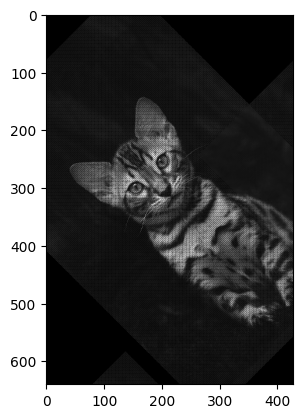

In [ ]:
angle = 45

rotated_img = rotate_image(gray_cat, np.radians(angle))
plt.imshow(rotated_img, cmap='gray')
plt.show()

# 심화 문제. composite_transformation

In [ ]:
# 아래의 함수를 완성하시오.
def composite_transformation(image, theta, translation) :
  cat = [[0 for j in range(len(image[0]))] for i in range(len(image))]

  for i in range(len(image)):
    for j in range(len(image[0])):
      a = (int((i - 320) * np.cos(theta) - (j - 213) * np.sin(theta) + 320 ) - translation[0])
      b =(int((i - 320) * np.sin(theta) + (j - 213) * np.cos(theta) + 213 ) + translation[1])

      # print(a,b)
      if a < 640 and b < 427:
        cat[a][b] = image[i][j]

  return cat

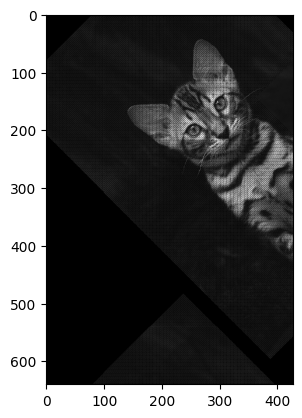

In [ ]:
angle = 45
t1, t2 = 100, 100 # 우상단으로 이동

new_image = composite_transformation(gray_cat, np.radians(angle), (t1, t2))
plt.imshow(new_image, cmap='gray')
plt.show()

이미지를 회전하기 위해 여러 어려움을 겪었습니다. 특히 이미지를 회전할 때 있어서 기존의 이미지에서 조각들이 흩어져서 어떻게 이미지들을 원래 상태를 유지하면서 회전할 수 있을 까 많이 고민하는 시간을 가졌습니다. 이미지의 중점을 찾아서 회전하는 방법을 선택했고, 이미지를 옮기는 것은 금방 진행할 수 있었습니다.